In [66]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
import imutils

In [67]:
num = 40
loc = r"C:\Users\Sidharth\Documents\code\HAPD\datasets\Carrada\2020-02-28-12-12-16"
cam = r"camera_images"
ra = r"range_angle_numpy"
ad = "angle_doppler_processed"
frame = "".join(["0" for _ in range(6-len(str(num)))])+str(num)

In [68]:
camera = cv2.imread(os.path.join(loc,os.path.join(cam,frame+".jpg")))
radar = np.load(os.path.join(loc,os.path.join(ra,frame+".npy")))

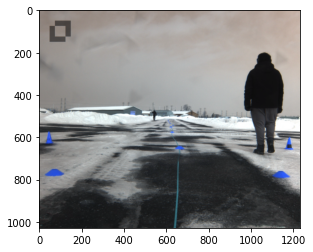

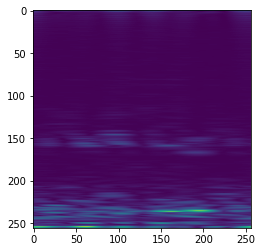

In [69]:
plt.imshow(camera)
plt.show()
plt.imshow(radar)
plt.show()

In [70]:
def find_max_value(array):
    max_value = float('-inf')
    max_position = None

    for i, row in enumerate(array):
        for j, value in enumerate(row):
            if value > max_value:
                max_value = value
                max_position = (i, j)

    return max_value, max_position
def find_max_value1d(array):
    max_value = float('-inf')
    max_position = None

    for i, value in enumerate(array):
        if value > max_value:
            max_value = value
            max_position = i

    return max_value, max_position
def find_max_value_first_column(array):
    first_column = array[:, 0]  # Extract the first column
    max_value = np.max(first_column)  # Find the maximum value
    max_position = np.argmax(first_column)  # Find the position of the maximum value

    return max_value, max_position


In [77]:
pos = []
for x in range(0,256,5):
    row_sum = np.sum(radar[5:225,x:x+6], axis=1)
    pos.append(find_max_value1d(row_sum))
val = find_max_value_first_column(np.array(pos))
print(50-(pos[val[1]][1]+5)*50/256)
print(val[0])

18.9453125
14933.4892578125


In [72]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())
x, y = 1, 1
valuesx = []
i = 0
valuesy = []
image = camera
image = imutils.resize(image,width=min(400, image.shape[1]))

(regions, _) = hog.detectMultiScale(image,
                                    winStride=(4, 4),
                                    padding=(4, 4),
                                    scale=1.05)
print("output in HOG", regions)

for (x1, y1, w, h) in regions:
    cv2.rectangle(image, (x1, y1),
                    (x1 + w, y1 + h),
                    (0, 0, 255), 2)
    i = i+1
    valuesx.append(((x-x1)/x1)*100)
    valuesy.append(((y-y1)/y1)*100)
    cv2.rectangle(image, (x, y),
                    (x + w, y + h),
                    (0, 255, 0), 2)  # green= predicted

# Showing the output Image
cv2.imshow("Image", image)
cv2.waitKey(0)
cv2.destroyAllWindows()
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

output in HOG [[289  35 110 221]]
